<h1 style="text-align:center;font-weight:bold">Visualizing Data with Matplotlib</h1>

<h3 style="font-weight:500">Dataset Selection</h3>

<p>Netflix is one of the most popular media and video streaming platforms. They have over 8k+ movies or tv shows available on their platform, as of mid-2024, they have over 282 million Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration more.</p>

<a>https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows</a>

In [29]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [30]:
#DataFrame
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
#Number of rows and columns
r,c=df.shape
print(f'The dataset has {r} rows and {c} columns')

The dataset has 8807 rows and 12 columns


Columns and Descriptions:
- show_id: Unique identifier for each show (s1, s2).
- type: Specifies whether the title is a "Movie" or "TV Show".
- title: The name of the Netflix title.
- director: The director of the title
- cast: The main actors involved in the title.
- country: The country where the title was produced.
- date_added: The date when the title was added to Netflix.
- release_year: The year the title was originally released.
- rating: The content rating ("PG-13", "TV-MA").
- duration: Duration of the movie (in minutes) or the number of seasons for TV shows.
- listed_in: Categories or genres the title falls under ("Documentaries", "TV Dramas").
- description: The summary description

<h3 style="font-weight:500">Plots</h3>

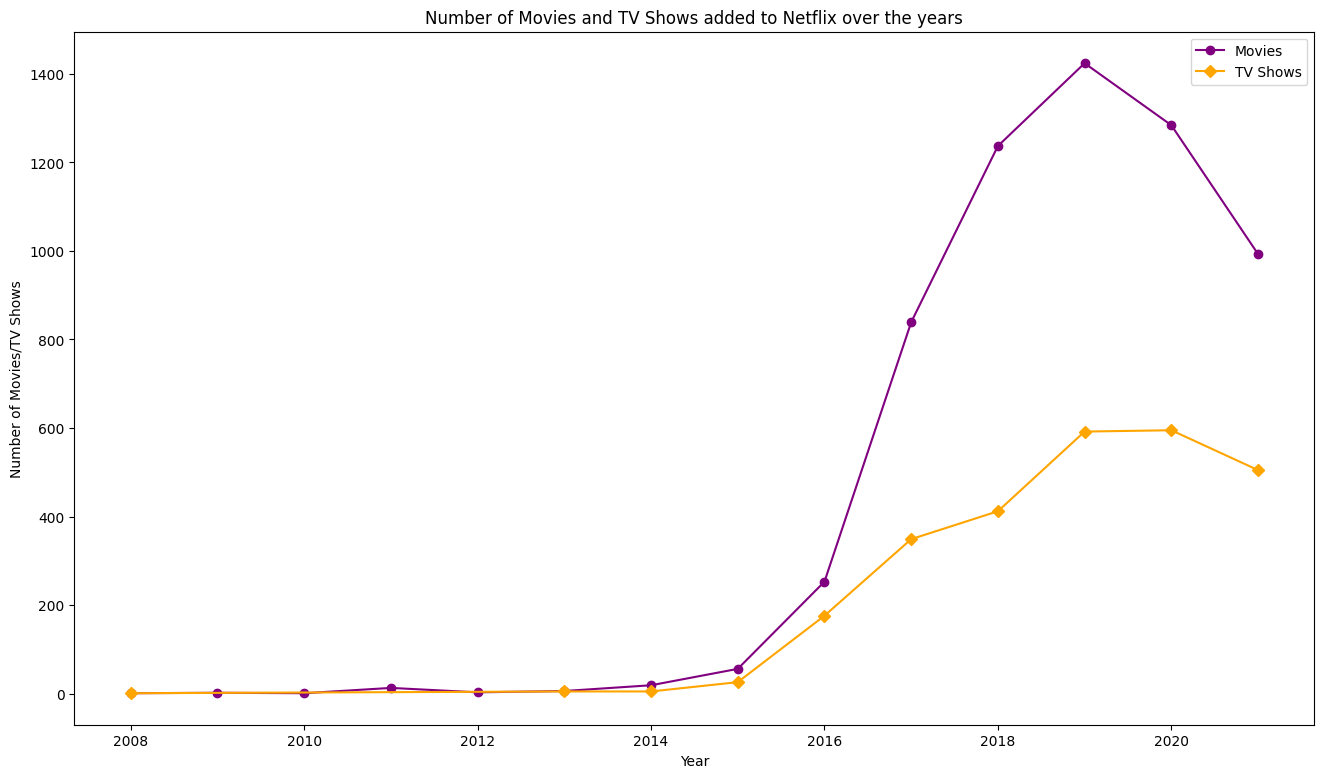

In [32]:
#Line Plot : Number of Movies and TV Shows added to Netflix over the years
df['date_added']=pd.to_datetime(df['date_added'].str.strip())
df['year_added']=df.date_added.dt.year
movieDf=df[df.type=='Movie']
tvShowDf=df[df.type=='TV Show']

plt.figure(figsize=(16,9))
plt.plot(movieDf.year_added.value_counts().sort_index(),marker='o',color='purple')
plt.plot(tvShowDf.year_added.value_counts().sort_index(),marker='D',color='orange')
plt.title('Number of Movies and TV Shows added to Netflix over the years')
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(['Movies','TV Shows'])
plt.show()

<p>The line plot of Netflix content releases over the years shows a clear trend of growth, with noticeable shifts at different periods. Before 2005, the number of releases was minimal since Netflix primarily operated as a DVD rental service. From 2005 to 2010, a slow but steady increase began as Netflix expanded its streaming rights. Between 2010 and 2015, the trend picked up significantly, reflecting the platform’s global reach and early investments in original content. A sharp surge occurred from 2015 to 2019, marking Netflix’s aggressive expansion into original productions and licensing deals, making it a dominant force in streaming. However, post-2019, the trend became more fluctuating, likely influenced by market saturation, competition, and the impact of the COVID-19 pandemic. If the plot shows a decline in the latest years, it may be due to incomplete data or strategic shifts in content production</p>

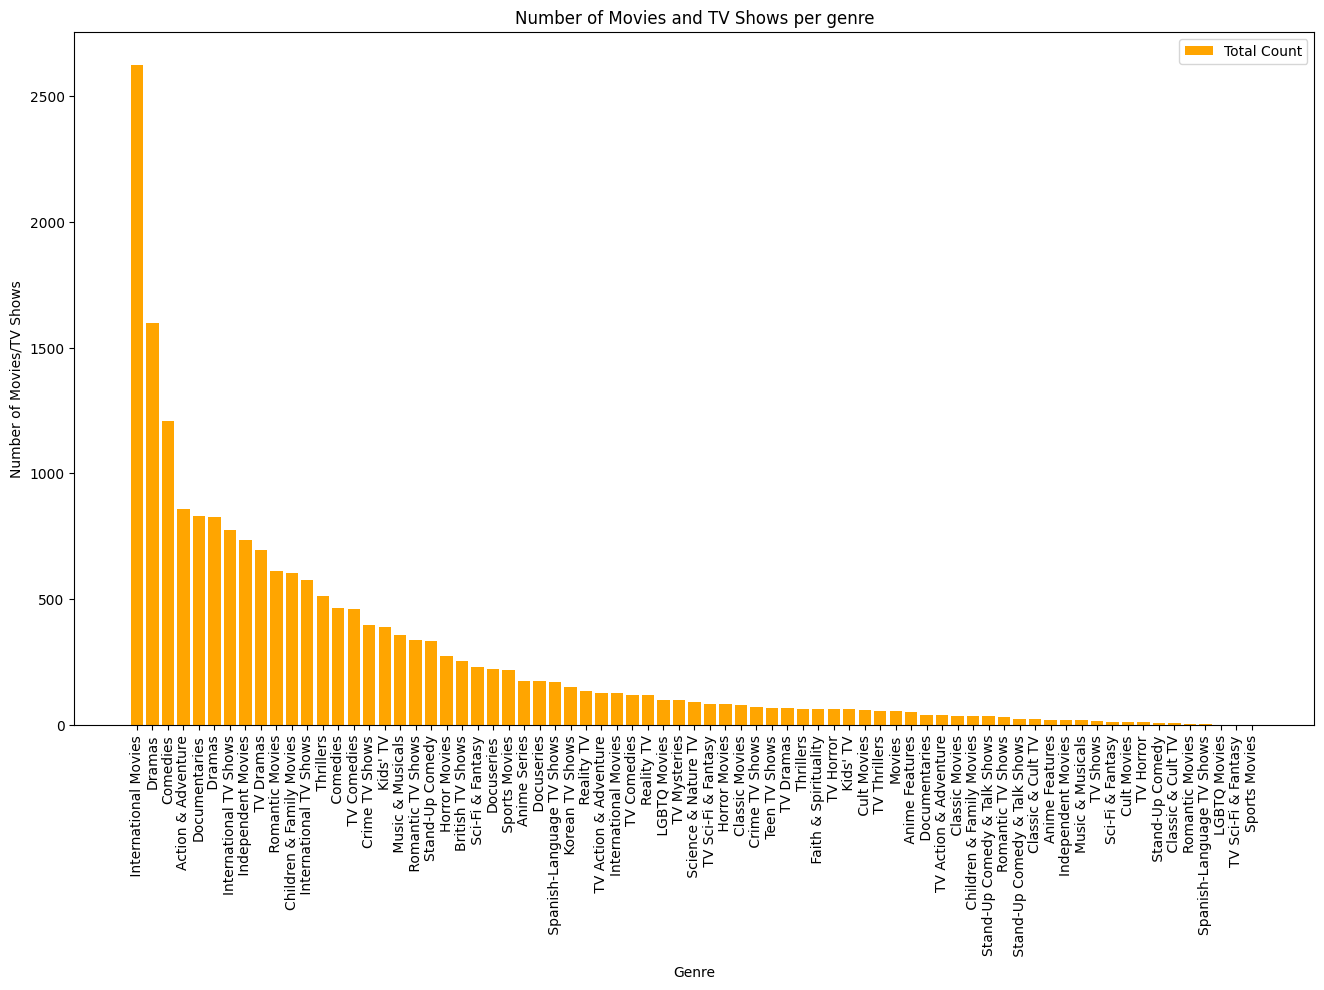

In [33]:
#Bar Chat : Number of Movies and TV Shows per genre
genresCount=df.listed_in.str.split(',').explode().value_counts()
plt.figure(figsize=(16,9))
plt.xticks(rotation=90)
plt.bar(genresCount.index,genresCount.values,color='orange')
plt.title('Number of Movies and TV Shows per genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(['Total Count'])
plt.show()

<p>This bar chart shows the number of movies and TV shows on Netflix across different genres. International Movies dominate with the highest count, showcasing Netflix's focus on global content. Following this, Dramas, Comedies, and Action & Adventure are also prominent, reflecting their widespread appeal among viewers. Genres such as Documentaries and Children & Family Movies indicate Netflix's efforts to cater to niche and younger audiences. Lesser-represented categories, like TV Sports Movies and Spanish-Language Stand-Up Comedy, highlight Netflix's ability to offer diverse but highly specific content. The overall distribution confirms Netflix's strategic emphasis on variety and international appeal.</p>

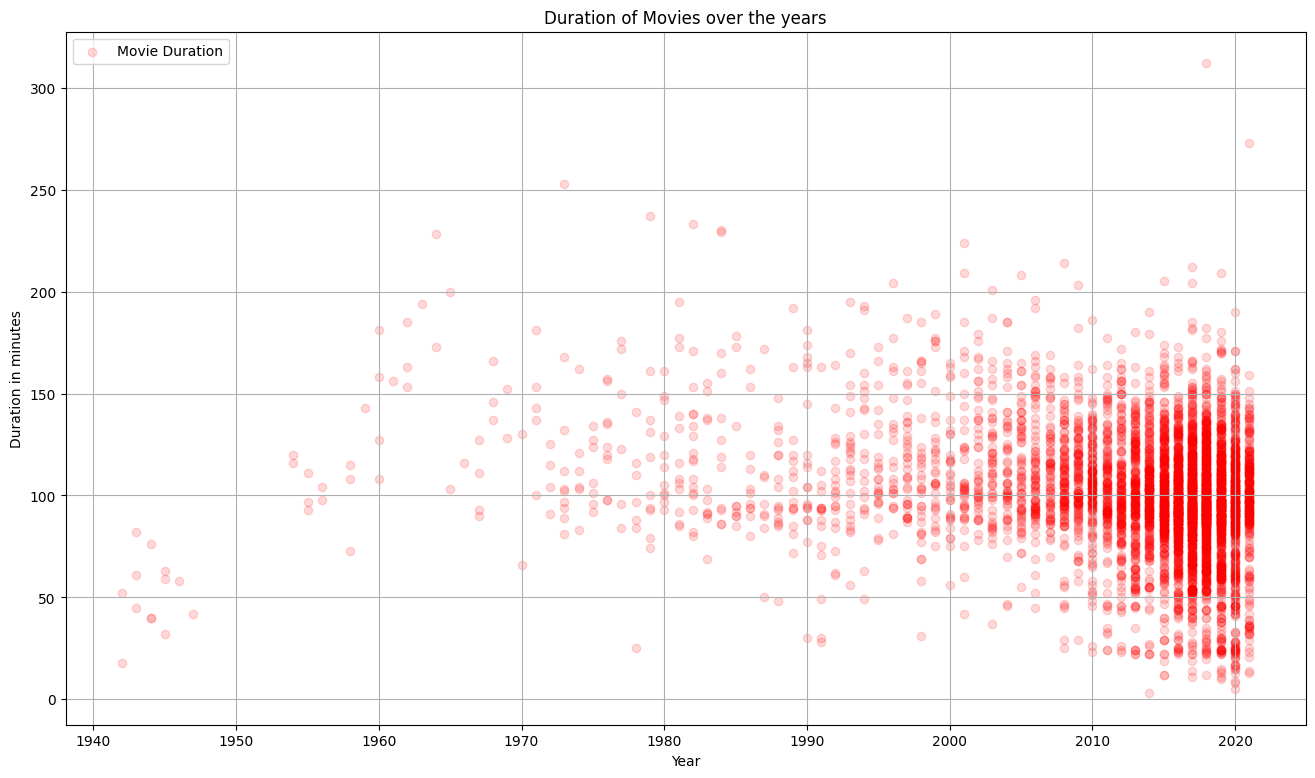

In [34]:
#Scatter Plot : Duration of Movies over the years
movieDf.loc[:,'duration'] = movieDf['duration'].str.replace(" min", "").astype(float)
plt.figure(figsize=(16,9))
plt.scatter(movieDf.release_year,movieDf.duration,color='red',alpha=0.15)
plt.title('Duration of Movies over the years')
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.legend(['Movie Duration'])
plt.grid()
plt.show()

<p>The scatterplot shows movie durations over time. In the 1940s-50s, movies were shorter, mostly under 100 minutes. Durations increased in the 1960s-80s, with some exceeding 200 minutes. From the 1990s onwards, most movies stabilized between 80-120 minutes, with occasional outliers over 300 minutes. The 2010s and beyond show higher production volumes, but durations remain consistent.</p>

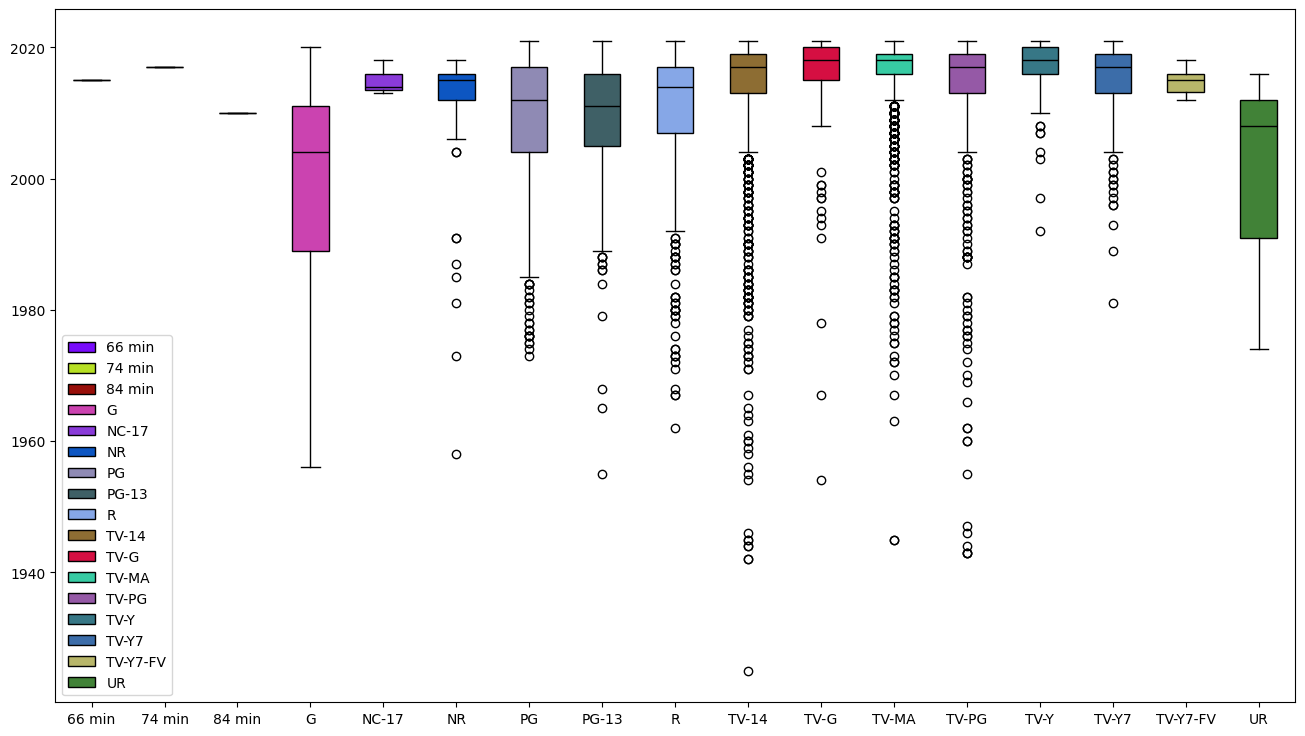

In [35]:
#Box Plot: Release Year of Movies and TV Shows per rating
plt.figure(figsize=(16, 9))
release_years = df.groupby('rating').release_year.apply(list).to_dict()
boxPlt=plt.boxplot(release_years.values(), tick_labels=release_years.keys(),patch_artist=True)
for box,median in zip(boxPlt['boxes'],boxPlt['medians']):
    box.set_facecolor(np.random.rand(3))
    median.set_color('black')
plt.legend(release_years.keys())
plt.show()

<p>The box plot shows the release years of movies and TV shows by rating. G, PG, PG-13, and R ratings span decades, with most content released post-2000. TV-specific ratings like TV-Y and TV-G are concentrated in recent years, reflecting modern trends. NR and UR ratings cover a broader range of years, spanning diverse content.</p>

<h3 style="font-weight:500"></h3>